In [76]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np

import seaborn as sns
import pandas as pd
from DMS2_utils import *
from create_trials_df import create_trials_df_from_dj
from dj_utils import return_date_window, ANIMAL_IDS
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
from datetime import datetime
from plot_days_info import *
# from create_summary_table import create_daily_summary_from_dj, lazy_load_daily_summary_df


# settings
%load_ext autoreload
%autoreload 
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
date_min, date_max = return_date_window(latest_date=None, n_days_back=20)

In [42]:
flex_date_min = (datetime.today()- timedelta(days=4)).strftime("%Y-%m-%d")
df = create_trials_df_from_dj(date_min=flex_date_min)

[2023-06-01 11:21:28,702][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 5 sessions for R610 between 2023-05-28 and 2023-06-01
fetched 5 sessions for R611 between 2023-05-28 and 2023-06-01
fetched 5 sessions for R612 between 2023-05-28 and 2023-06-01
fetched 5 sessions for R613 between 2023-05-28 and 2023-06-01
fetched 5 sessions for R614 between 2023-05-28 and 2023-06-01


In [43]:
make_daily_stage_plots(df, overwrite=False)

plotting stage 3 / 4 plot R610 on 2023-06-01
plotting stage 3 / 4 plot R611 on 2023-06-01
plotting stage 3 / 4 plot R612 on 2023-06-01
plotting stage 3 / 4 plot R613 on 2023-06-01
plotting stage 3 / 4 plot R614 on 2023-06-01


In [77]:
days_df = lazy_load_days_summary_df(
    date_min=flex_date_min, 
    date_max=datetime.today().strftime("%Y-%m-%d"),
    save_out=True
)

Loaded pre-saved df with entries between 2023-05-28 and 2023-06-01.


asdlkfjsakldf


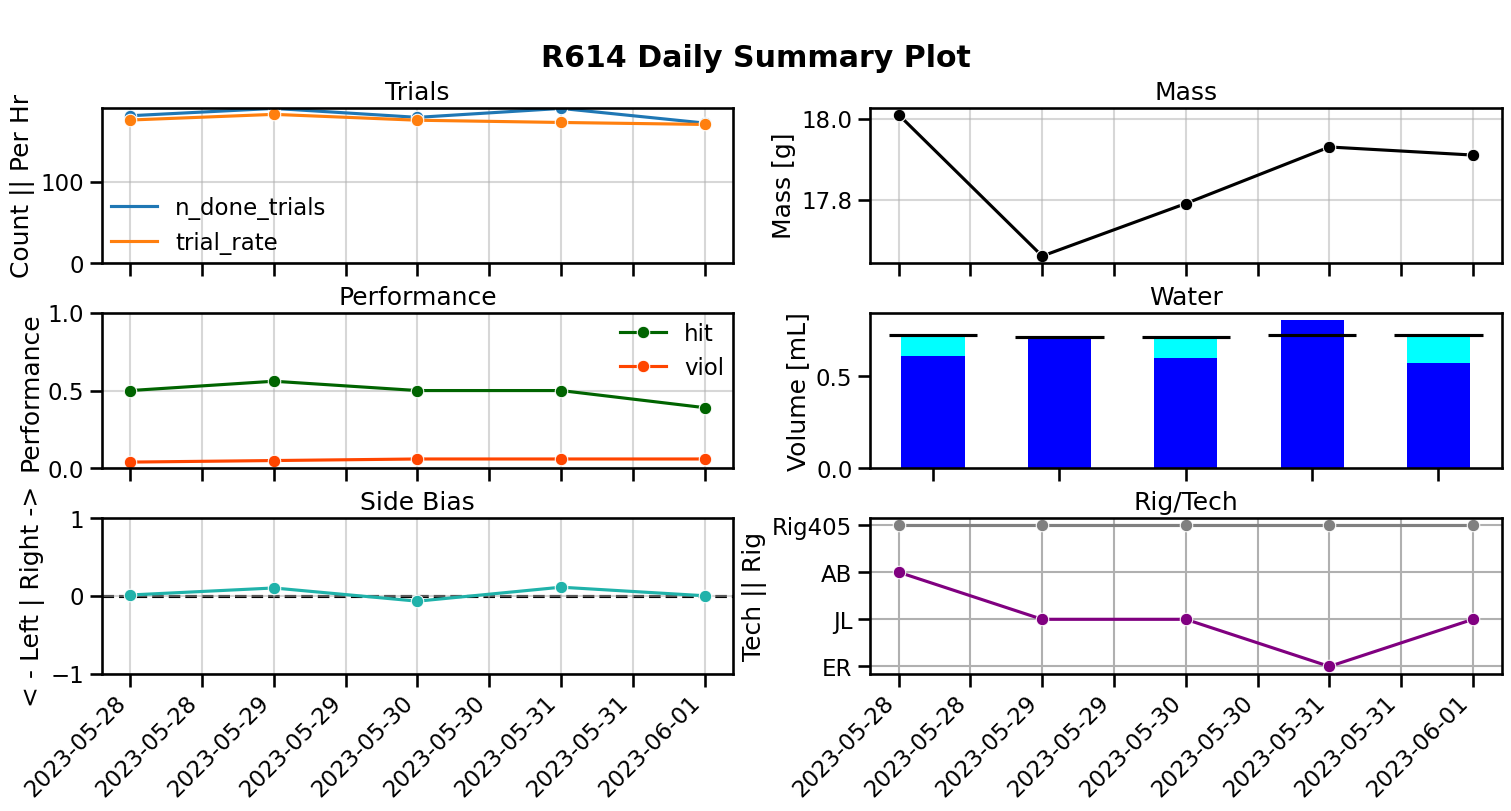

In [65]:
from plot_days_info import *
## Initialize mutli-axis figure
layout = """
    AAABBB
    CCCDDD
    EEEFFF
"""
fig = plt.figure(constrained_layout=True, figsize=(15,8))
ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
plt.suptitle(f"\nR614 Daily Summary Plot", fontweight="semibold")


## Plot
# left column
plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

# right column
plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
plot_water_restriction(animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False)
plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)

# plots to add
# stage plot
# time to spoke (or cpoke eventually)
# delay dur
# trial result plot (stacked or unstacked option, unstacked might be better)
# antibias params
## eventually!
# sessions start time
# pre go/ viol off
# settling, pre go, sa, delay, sb, post sb times across days
# give info, sma info, etc (maybe on oneof those dot plots)
# stimulus information

